In [1]:
import os
os.getcwd()

'c:\\Users\\azaan\\OneDrive\\Documents\\GitHub\\Data-Nerds'

## 1.88 wildfire dataset

In [2]:
# https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/code?select=FPA_FOD_20170508.sqlite

import pandas
import sqlite3

filepath = 'datasets\wildfire_data\FPA_FOD_20170508.sqlite'

# sqlite random testing
con = sqlite3.connect(filepath)
cur = con.cursor()

# execute var
cursor = cur.execute('SELECT * FROM spatial_ref_sys_aux;')
names = list(map(lambda x: x[0], cursor.description))
print(names)

# The result of a "cursor.execute" can be iterated over by row
i = 0
for row in cursor:
    print(row)
    i += 1
    if i > 100:
        break

['srid', 'is_geographic', 'has_flipped_axes', 'spheroid', 'prime_meridian', 'datum', 'projection', 'unit', 'axis_1_name', 'axis_1_orientation', 'axis_2_name', 'axis_2_orientation']
(2000, 0, 0, 'Clarke 1880 (RGS)', 'Greenwich', 'Anguilla_1957', 'Transverse_Mercator', 'metre', 'Easting', 'East', 'Northing', 'North')
(2001, 0, 0, 'Clarke 1880 (RGS)', 'Greenwich', 'Antigua_1943', 'Transverse_Mercator', 'metre', 'Easting', 'East', 'Northing', 'North')
(2002, 0, 0, 'Clarke 1880 (RGS)', 'Greenwich', 'Dominica_1945', 'Transverse_Mercator', 'metre', 'Easting', 'East', 'Northing', 'North')
(2003, 0, 0, 'Clarke 1880 (RGS)', 'Greenwich', 'Grenada_1953', 'Transverse_Mercator', 'metre', 'Easting', 'East', 'Northing', 'North')
(2004, 0, 0, 'Clarke 1880 (RGS)', 'Greenwich', 'Montserrat_1958', 'Transverse_Mercator', 'metre', 'Easting', 'East', 'Northing', 'North')
(2005, 0, 0, 'Clarke 1880 (RGS)', 'Greenwich', 'St_Kitts_1955', 'Transverse_Mercator', 'metre', 'Easting', 'East', 'Northing', 'North')
(20

In [3]:
#results: kinda a wash, that dataset is confusing

## USA+California Wildfire Data

In [4]:
# https://www.kaggle.com/datasets/avkashchauhan/california-wildfire-dataset-from-2000-2021?resource=download

import pandas as pd

filepath = 'datasets\wildfire_data\ca_wildfires\ca_daily_fire_2000_2021-v2.csv'
data = pandas.read_csv(filepath)

data

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
...,...,...,...,...,...,...,...,...,...,...,...
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11
221179,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97,2012,8
221180,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91,2007,7
221181,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62,2018,7


In [5]:
data.mean()

C:\Users\azaan\AppData\Local\Temp\ipykernel_33992\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


latitude        38.218017
longitude     -120.263418
frp            137.750609
type             0.010991
bright_t31     299.375297
confidence      83.162490
year          2012.581812
month            7.933978
dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (221183,) and arg 1 with shape (4,).

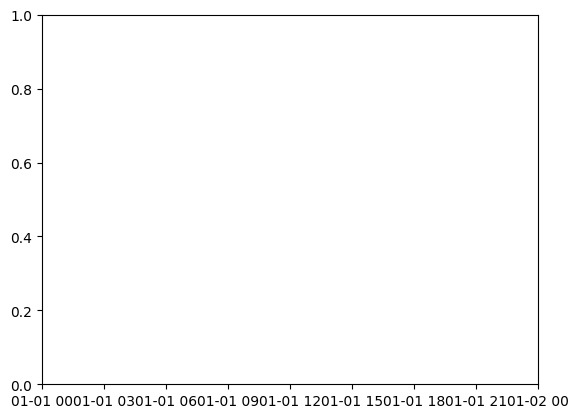

In [6]:
import matplotlib.pyplot as plt

# need to convert date to datetime to do this
data['Date'] = pd.to_datetime(data['year'])

# plt.hist(la_df[' AvgTemperature'])
fig, ax = plt.subplots()
ax.bar(data['Date'], (data['type'].value_counts()))
ax.set_ylim([0,100])
plt.show()